<a href="https://colab.research.google.com/github/devbabbar7/Clothes-classifier/blob/main/Clothes%20predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install tensorflow-gpu

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.9.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

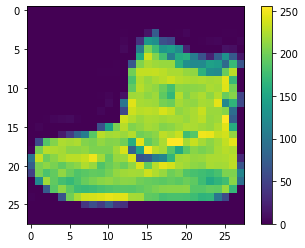

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [9]:
train_images = train_images / 255.0
test_images = test_images / 255.0

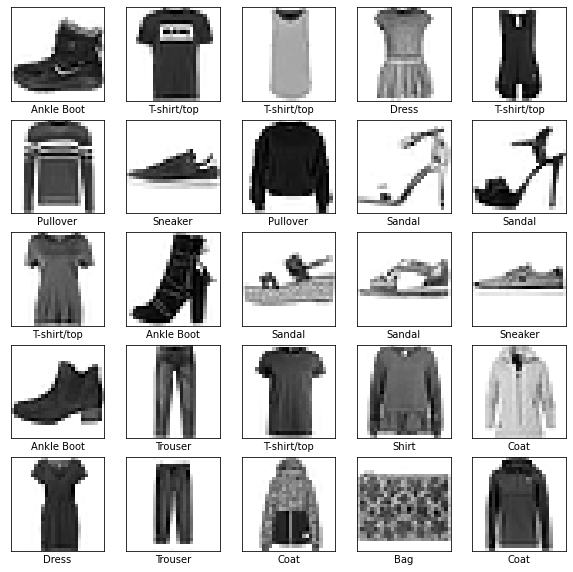

In [10]:
%matplotlib inline
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4953 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3745 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3378 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2938 - accuracy: 0.8921


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8735
Test accuracy:  0.8734999895095825


In [16]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 1ms/step


array([1.1589808e-06, 8.3715994e-09, 1.1643606e-06, 4.5149422e-09,
       1.7310818e-07, 8.6939409e-03, 6.2639638e-06, 4.5736559e-02,
       1.0403290e-05, 9.4555038e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])
test_labels[0]

9

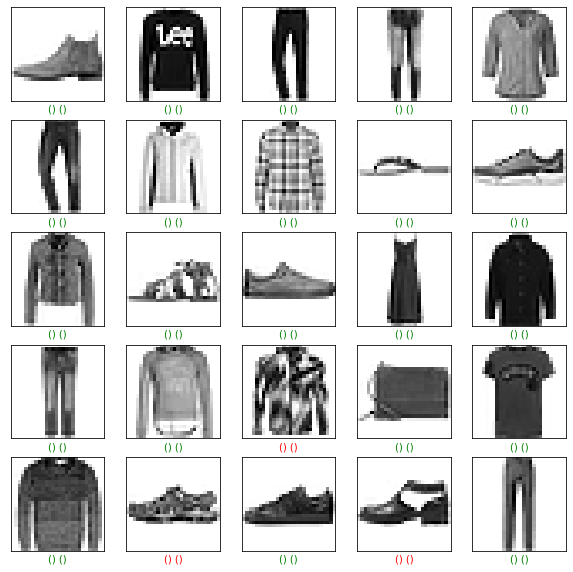

In [20]:
#Plot the first 25 test images, their predicted label, and the true label
#Color correct predictions in green, incorrect predictions in red
plt.figure (figsize = ( 10, 10))
for i in range (25):
  plt.subplot (5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label==true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel ( "() ()".format (class_names[predicted_label],
                               class_names[true_label] ),
                                color=color)

(28, 28)


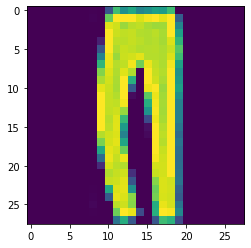

In [119]:
'''from PIL import Image
img = Image.open("/81i057rz8gS._UL1500_.jpg").convert('L').resize((28, 28), Image.ANTIALIAS)
img = np.array(img)'''
'''img = tf.keras.preprocessing.image.load_img("/mens-designer-casual-shirt-500x500.jpg")#.resize((28, 28))
img = np.array(img)
img = img[:,:,0]'''

img = test_images[2]
print(img.shape)
plt.imshow(img)

In [120]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [121]:
predictions = model.predict(img)
print(predictions[0])
print(np.argmax(predictions))
print(class_names[np.argmax(predictions)])

1/1 [==============================] - 0s 15ms/step
[1.0014275e-08 1.0000000e+00 1.7941133e-11 1.2336060e-08 5.6196958e-09
 9.9802921e-17 1.0671425e-09 9.9011521e-17 7.3591973e-11 1.0968438e-17]
1
Trouser
